# Introducción a Python para IA.

 <p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><a property="dct:title" rel="cc:attributionURL" href="https://github.com/luiggix/intro_MeIA_2023">Introducción a Python para IA</a> by <span property="cc:attributionName">Luis Miguel de la Cruz Salas</span> is licensed under <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">CC BY-NC-SA 4.0<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/nc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1"></a></p> 

# Descomposición en Valores Singulares.

La descomposición en valores singulares (SVD por sus siglas en inglés) es un método para la reducción de dimensionalidad. En pocas palabras, SVD descompone una matriz en otras tres matrices.

SVD es uno de los métodos de factorización de matrices más populares debido a sus numerosas aplicaciones:

* Inversión de matrices.
* Compresión de datos.
* Eliminación de ruido en datos.
* Procesos de Inteligencia Artificial.

Una matriz puede verse como una transformación lineal en el espacio (rotación, traslación, escalamiento), en este sentido SVD descompone una transformación en tres movimientos.

Matemáticamente tenemos:

$$
A_{n\times p} = U_{n\times n} S_{n\times p} V^T_{p\times p} 
$$

donde $n$ representa el número de renglones (muestras), y $p$ representa el número de dimensiones (variables).

$$
\underbrace{
\left[
\begin{array}{ccc}
a_{00} & a_{01} & a_{02} \\
a_{10} & a_{11} & a_{12} \\
a_{20} & a_{21} & a_{22} \\
a_{30} & a_{31} & a_{32} \\
\end{array}
\right] }_{4 \times 3}
= 
\underbrace{
\underbrace{
\left[
\begin{array}{ccc}
u_{00} & u_{01} & u_{02} & u_{03}\\
u_{10} & u_{11} & u_{12} & u_{13}\\
u_{20} & u_{21} & u_{22} & u_{23}\\
u_{30} & u_{31} & u_{32} & u_{33}\\
\end{array}
\right]}_{4 \times 4}
\underbrace{
\underbrace{
\left[
\begin{array}{ccc}
s_{00} & 0 & 0 \\
0 & s_{11} & 0 \\
0 & 0 & s_{22} \\
0 & 0 & 0  \\
\end{array}
\right]}_{4 \times 3}
\underbrace{
\left[
\begin{array}{ccc}
v_{00} & v_{01} & v_{02} \\
v_{10} & v_{11} & v_{12} \\
v_{20} & v_{21} & v_{22} \\
\end{array}
\right]}_{3 \times 3} 
}_{4 \times 3}
}_{4 \times 3}
$$

## Descripción de las matrices.
$U$ y $V^T$ son matrices ortogonales, $S$ es una matriz de valores singulares. En términos de transformaciones,tenemos que $U$ y $V^T$ producen rotaciones y $S$ produces un escalamiento. 


La columnas de $U$ son los eigenvectores ortonormales de la matriz $A A^T$ y se conocen como los vectores singulares izquierdos de $A$.

La columnas de $V$ son los eigenvectores ortonormales de la matriz $A^T A$ y se conocen como los vectores singulares derechos de $A$.

Los valores singulares de la matriz $S$ son las raíces cuadradas de los eigenvalores de la matriz $A^T A$ (equivalentemente de $A A^T)$ colocados en su diagonal en orden descendente.


## Reducción de dimensionalidad.

Lo interesante de esta descomposición es que se puede reducir dimensionalidad si quitamos algunos elementos de las matrices $U$, $S$ y $V$:

$$
\underbrace{
\left[
\begin{array}{ccc}
a_{00} & a_{01} & a_{02} \\
a_{10} & a_{11} & a_{12} \\
a_{20} & a_{21} & a_{22} \\
a_{30} & a_{31} & a_{32} \\
\end{array}
\right] }_{4 \times 3}
\approx
\underbrace{
\left[
\begin{array}{ccc}
a^{*}_{00} & a^{*}_{01} & a^{*}_{02} \\
a^{*}_{10} & a^{*}_{11} & a^{*}_{12} \\
a^{*}_{20} & a^{*}_{21} & a^{*}_{22} \\
a^{*}_{30} & a^{*}_{31} & a^{*}_{32} \\
\end{array}
\right] }_{4 \times 3}
= 
\underbrace{
\underbrace{
\left[
\begin{array}{ccc}
u_{00} & u_{01} & u_{02} & u_{03}\\
u_{10} & u_{11} & u_{12} & u_{13}\\
u_{20} & u_{21} & u_{22} & u_{23}\\
u_{30} & u_{31} & u_{32} & u_{33}\\
\end{array}
\right]}_{4 \times 4}
\underbrace{
\underbrace{
\left[
\begin{array}{ccc}
s_{00} & 0 \\
0 & s_{11} \\
0 & 0  \\
0 & 0  \\
\end{array}
\right]}_{4 \times 2}
\underbrace{
\left[
\begin{array}{ccc}
v_{00} & v_{01} & v_{02} \\
v_{10} & v_{11} & v_{12} \\
\end{array}
\right]}_{2 \times 3} 
}_{4 \times 3}
}_{4 \times 3}
$$

In [65]:
import numpy as np

In [82]:
A = np.array([[1,2,3,4,5],
           [6,7,8,9,10],
           [11,12,13,14,15],
           [16,17,18,19,20],])

print('A {} : \n {}'.format(A.shape, A))

A (4, 5) : 
 [[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]]


In [83]:
U, S, VT = np.linalg.svd(A)

print('U {} : \n {}'.format(U.shape, U))
print('S {} : \n {}'.format(S.shape, S))
print('VT {} : \n {}'.format(VT.shape, VT))

U (4, 4) : 
 [[ 0.13090849  0.82635523 -0.16661643 -0.52176524]
 [ 0.33877435  0.43038581 -0.16674561  0.81987554]
 [ 0.5466402   0.03441638  0.83334051 -0.07445536]
 [ 0.75450606 -0.36155305 -0.49997847 -0.22365494]]
S (4,) : 
 [5.34907712e+01 2.95590958e+00 4.42181583e-15 4.18167321e-16]
VT (5, 5) : 
 [[ 0.37854556  0.41165088  0.4447562   0.47786152  0.51096684]
 [-0.67579824 -0.36130812 -0.04681799  0.26767213  0.58216225]
 [ 0.61949645 -0.53332529 -0.37331277 -0.13138439  0.418526  ]
 [-0.08904454  0.13752236  0.38244863 -0.82128618  0.39035973]
 [-0.09107811  0.62980294 -0.71719636 -0.09070362  0.26917516]]



Observa que la $S$ no está dada en formato matriz.

In [84]:
Sigma = np.zeros(A.shape)
Sigma[:len(S), :len(S)] = np.diag(S)
print('S {} : \n {}'.format(Sigma.shape, Sigma))

S (4, 5) : 
 [[5.34907712e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 2.95590958e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.42181583e-15 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.18167321e-16
  0.00000000e+00]]


Reconstruimos la matriz:

In [85]:
np.dot(U, np.dot(Sigma, VT))

array([[ 1.,  2.,  3.,  4.,  5.],
       [ 6.,  7.,  8.,  9., 10.],
       [11., 12., 13., 14., 15.],
       [16., 17., 18., 19., 20.]])

Checa que las matrices `U` y `VT` son ortonormales.

Ahora reconstruimos la matriz eliminando algunas componentes:

In [86]:
comp = 2
Sigma = Sigma[:, : comp] # Solo las primeras componentes de S
                         # Las primeras columnas
VT = VT[:comp, :]  # Solo las primeras componentes de VT
                         # Los primeros renglones
    
print('S {} : \n {}'.format(Sigma.shape, Sigma))
print('VT {} : \n {}'.format(VT.shape, VT))

S (4, 2) : 
 [[53.49077115  0.        ]
 [ 0.          2.95590958]
 [ 0.          0.        ]
 [ 0.          0.        ]]
VT (2, 5) : 
 [[ 0.37854556  0.41165088  0.4447562   0.47786152  0.51096684]
 [-0.67579824 -0.36130812 -0.04681799  0.26767213  0.58216225]]


Reconstruimos la matriz nuevamente:

In [87]:
np.dot(U, np.dot(Sigma, VT))

array([[ 1.,  2.,  3.,  4.,  5.],
       [ 6.,  7.,  8.,  9., 10.],
       [11., 12., 13., 14., 15.],
       [16., 17., 18., 19., 20.]])

## Aplicación a imágenes

In [134]:
from PIL import Image
import matplotlib.pyplot as plt

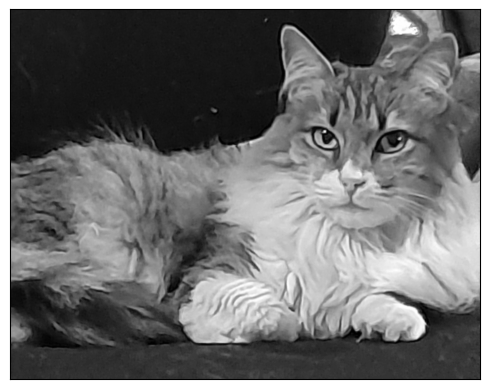

In [178]:
imagen = np.asarray(Image.open('../utils/fig/img01.jpg').convert("L"))
plt.imshow(imagen, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [179]:
# Descomposición SVD
U, S, VT = np.linalg.svd(imagen)
Sm = np.zeros(imagen.shape)
Sm[:len(S), :len(S)] = np.diag(S)

print('U {} '.format(U.shape))
print('S {} '.format(Sm.shape))
print('VT {} '.format(VT.shape))

# Reconstrucción
imagen_original = np.dot(U, np.dot(Sm, VT))

U (787, 787) 
S (787, 1000) 
VT (1000, 1000) 


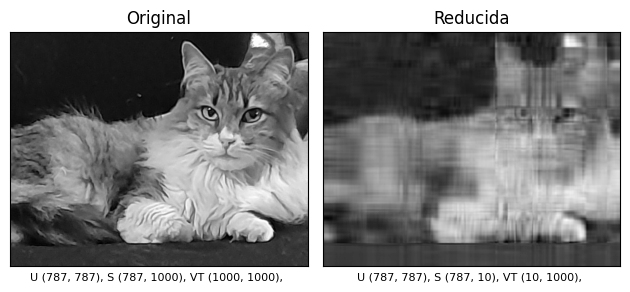

In [190]:
# Reducción de componentes
comp = 10
S_r = Sm[:, : comp] # Solo las primeras componentes de S, (las primeras columnas).
VT_r = VT[:comp, :]  # Solo las primeras componentes de VT (los primeros renglones)

# Reconstrucción con información reducida
imagen_reducida =np.dot(U, np.dot(S_r, VT_r))

xinfo_o = 'U {}, '.format(U.shape) + 'S {}, '.format(Sm.shape) + 'VT {}, '.format(VT.shape)
xinfo_r = 'U {}, '.format(U.shape) + 'S {}, '.format(S_r.shape) + 'VT {}, '.format(VT_r.shape)

plt.subplot(121)
plt.imshow(imagen_original, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Original')
plt.xlabel(xinfo_o, fontsize=8)

plt.subplot(122)
plt.imshow(imagen_reducida, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Reducida')
plt.xlabel(xinfo_r, fontsize=8)


plt.tight_layout()
plt.show()